In [2]:
import numpy as np
import qutip as qt
from matplotlib import pyplot as plt
from scipy.special import hermite
from scipy.integrate import quad

In [3]:
N = 100  # Size of the Hilbert space
omega = 1.0  # Oscillator frequency
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units

# Position and momentum scaling factors
x_0 = 1 / np.sqrt(2 * m * omega)  # x_0: characteristic length scale
p_0 = np.sqrt(m * omega / 2)  # p_0: characteristic momentum scale

In [ ]:
N = 100  # Size of the Hilbert space
omega = 1.0  # Oscillator frequency
m = 1.0  # Mass of the particle
hbar = 1.0  # Planck's constant in natural units

# Position and momentum scaling factors
x_0 = 1 / np.sqrt(2 * m * omega)  # x_0: characteristic length scale
p_0 = np.sqrt(m * omega / 2)  # p_0: characteristic momentum scale

# ### Define operators for the quantum harmonic oscillator

a = qt.destroy(N)  # Annihilation operator
id_op = qt.identity(N)  # Identity operator
n_op = a.dag() * a  # Number operator
x_op = (a + a.dag()) * x_0  # Position operator
p_op = -1j * (a - a.dag()) * p_0  # Momentum operator

def harmonic_potential(x, omega, m=1):
    """
    Harmonic oscillator potential function.
    V(x) = 0.5 * m * omega^2 * x^2
    """
    return 0.5 * m * omega**2 * x**2

x_values = np.linspace(-5 * x_0, 5 * x_0, 1000)  # Position grid

# Define wavefunctions based on the recurrence relation
def psi_0(x):
    return (1 / (2 * np.pi * x_0**2)**0.25) * np.exp(-x**2 / (4 * x_0**2))

def psi_1(x):
    return (x / x_0) * psi_0(x)

def psi_2(x):
    return (1 / np.sqrt(2)) * ((x / x_0)**2 - 1) * psi_0(x)

def psi_3(x):
    return (1 / np.sqrt(6)) * (x / x_0) * ((x / x_0)**2 - 3) * psi_0(x)

def prob_0(x):
    return np.abs(psi_0(x))**2

def prob_1(x):
    return np.abs(psi_1(x))**2

def prob_2(x):
    return np.abs(psi_2(x))**2

##define psi_n by recurrence
def psi_n(x, n, x_0=1.0):
    psin = []
    
    # Initialize psi_{-1} as 0 and psi_0 as the known function
    psi_minus1 = np.zeros_like(x)  # Psi_{-1}(x) = 0
    psi_0 = ( np.exp(-x**2 / (4 * x_0**2))/ (2 * np.pi * x_0**2)**0.25)  # Psi_0(x)
    
    psin.append(psi_minus1)
    psin.append(psi_0)
    # Calculate psi_n(x) for 1 <= n <= desired n using recurrence relation
    for i in range(1, n+1):
        psi_next = (x * psin[i] / x_0  - np.sqrt(i-1) * psin[i-1]) / np.sqrt(i)
        psin.append(psi_next)
    
    # Return only the desired psi_n
    return psin[-1]

##define prob density of psi_n
def prob_psi_n(x,n,x_0=1):
    return np.abs(psi_n(x,n,x_0))**2

def energy_levels(n,omega):
    return hbar*omega*(n+1/2)

def normalize_check(n,x_0):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0), -np.inf, np.inf)
    return integral

def overlap_integral(x, n1, n2, x_0=1.0):
    integral, error = quad(lambda x: psi_n(x, n1, x_0=1.0) * psi_n(x, n2, x_0=1.0), -np.inf, np.inf)
    return integral

def find_oscillator(x,n,interval,x_0=1):
    integral, error = quad(lambda x: prob_psi_n(x,n,x_0=1), -interval, interval)
    return integral

def calc_xcr(x_0,n):
    return x_0*np.sqrt(4*(n+1/2))

In [6]:
x_0 = 1
x_values = np.linspace(-7 * x_0, 7 * x_0, 10000)  # Position grid
omega = hbar / (2 * m * x_0**2)

# Calculate wave functions and their squares
psi_0_vals = psi_n(x_values, 0, x_0=1.0)
psi_1_vals = psi_n(x_values, 1, x_0=1.0)
psi_2_vals = psi_n(x_values, 2, x_0=1.0)
psi_3_vals = psi_n(x_values, 3, x_0=1.0)

prob_0 = np.abs(psi_0_vals)**2
prob_1 = np.abs(psi_1_vals)**2
prob_2 = np.abs(psi_2_vals)**2
prob_3 = np.abs(psi_3_vals)**2

# Calculate energy levels
energy_0 = energy_levels(0,omega)
energy_1 = energy_levels(1,omega)
energy_2 = energy_levels(2,omega)
energy_3 = energy_levels(3,omega)

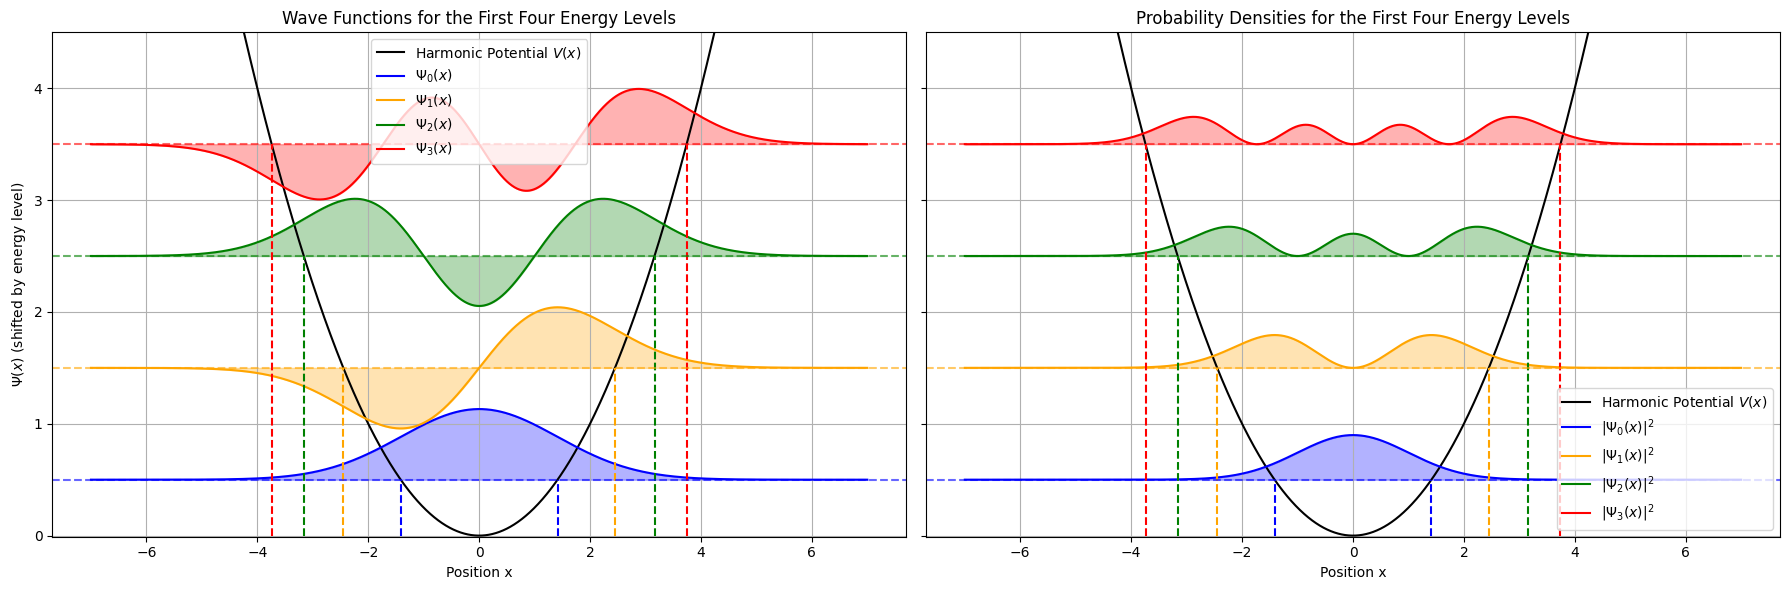

In [7]:
xcr0 = calc_xcr(x_0, 0)
xcr1 = calc_xcr(x_0, 1)
xcr2 = calc_xcr(x_0, 2)
xcr3 = calc_xcr(x_0, 3)

# Calculate the potential
potential = harmonic_potential(x_values, omega)

# Initialize the subplot
fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot for wave functions
ax[0].plot(x_values, potential / (hbar * omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")

ax[0].plot(x_values, psi_0_vals + energy_0 / (hbar * omega), label=r"$\Psi_0(x)$", color="blue")
ax[0].vlines(xcr0, ymin=0, ymax=energy_0 / (hbar * omega), linestyles='dashed', colors="blue")
ax[0].vlines(-xcr0, ymin=0, ymax=energy_0 / (hbar * omega), linestyles='dashed', colors="blue")
ax[0].fill_between(x_values, energy_0 / (hbar * omega), psi_0_vals + energy_0 / (hbar * omega), color="blue", alpha=0.3)  # Highlight area

ax[0].plot(x_values, psi_1_vals + energy_1 / (hbar * omega), label=r"$\Psi_1(x)$", color="orange")
ax[0].vlines(xcr1, ymin=0, ymax=energy_1 / (hbar * omega), linestyles='dashed', colors="orange")
ax[0].vlines(-xcr1, ymin=0, ymax=energy_1 / (hbar * omega), linestyles='dashed', colors="orange")
ax[0].fill_between(x_values, energy_1 / (hbar * omega), psi_1_vals + energy_1 / (hbar * omega), color="orange", alpha=0.3)  # Highlight area

ax[0].plot(x_values, psi_2_vals + energy_2 / (hbar * omega), label=r"$\Psi_2(x)$", color="green")
ax[0].vlines(xcr2, ymin=0, ymax=energy_2 / (hbar * omega), linestyles='dashed', colors="green")
ax[0].vlines(-xcr2, ymin=0, ymax=energy_2 / (hbar * omega), linestyles='dashed', colors="green")
ax[0].fill_between(x_values, energy_2 / (hbar * omega), psi_2_vals + energy_2 / (hbar * omega), color="green", alpha=0.3)  # Highlight area

ax[0].plot(x_values, psi_3_vals + energy_3 / (hbar * omega), label=r"$\Psi_3(x)$", color="red")
ax[0].vlines(xcr3, ymin=0, ymax=energy_3 / (hbar * omega), linestyles='dashed', colors="red")
ax[0].vlines(-xcr3, ymin=0, ymax=energy_3 / (hbar * omega), linestyles='dashed', colors="red")
ax[0].fill_between(x_values, energy_3 / (hbar * omega), psi_3_vals + energy_3 / (hbar * omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
ax[0].axhline(y=energy_0 / (hbar * omega), color="blue", linestyle="--", alpha=0.6)
ax[0].axhline(y=energy_1 / (hbar * omega), color="orange", linestyle="--", alpha=0.6)
ax[0].axhline(y=energy_2 / (hbar * omega), color="green", linestyle="--", alpha=0.6)
ax[0].axhline(y=energy_3 / (hbar * omega), color="red", linestyle="--", alpha=0.6)

ax[0].set_title("Wave Functions for the First Four Energy Levels")
ax[0].set_xlabel("Position x")
ax[0].set_ylabel(r"$\Psi(x)$ (shifted by energy level)")
ax[0].legend()
ax[0].grid()

# Plot for probability densities
ax[1].plot(x_values, potential / (hbar * omega), label="Harmonic Potential $V(x)$", color='black', linestyle="-")
ax[1].plot(x_values, prob_0 + energy_0 / (hbar * omega), label=r"$|\Psi_0(x)|^2$", color="blue")
ax[1].vlines(xcr0, ymin=0, ymax=energy_0 / (hbar * omega), linestyles='dashed', colors="blue")
ax[1].vlines(-xcr0, ymin=0, ymax=energy_0 / (hbar * omega), linestyles='dashed', colors="blue")
ax[1].fill_between(x_values, energy_0 / (hbar * omega), prob_0 + energy_0 / (hbar * omega), color="blue", alpha=0.3)  # Highlight area

ax[1].plot(x_values, prob_1 + energy_1 / (hbar * omega), label=r"$|\Psi_1(x)|^2$", color="orange")
ax[1].vlines(xcr1, ymin=0, ymax=energy_1 / (hbar * omega), linestyles='dashed', colors="orange")
ax[1].vlines(-xcr1, ymin=0, ymax=energy_1 / (hbar * omega), linestyles='dashed', colors="orange")
ax[1].fill_between(x_values, energy_1 / (hbar * omega), prob_1 + energy_1 / (hbar * omega), color="orange", alpha=0.3)  # Highlight area

ax[1].plot(x_values, prob_2 + energy_2 / (hbar * omega), label=r"$|\Psi_2(x)|^2$", color="green")
ax[1].vlines(xcr2, ymin=0, ymax=energy_2 / (hbar * omega), linestyles='dashed', colors="green")
ax[1].vlines(-xcr2, ymin=0, ymax=energy_2 / (hbar * omega), linestyles='dashed', colors="green")
ax[1].fill_between(x_values, energy_2 / (hbar * omega), prob_2 + energy_2 / (hbar * omega), color="green", alpha=0.3)  # Highlight area

ax[1].plot(x_values, prob_3 + energy_3 / (hbar * omega), label=r"$|\Psi_3(x)|^2$", color="red")
ax[1].vlines(xcr3, ymin=0, ymax=energy_3 / (hbar * omega), linestyles='dashed', colors="red")
ax[1].vlines(-xcr3, ymin=0, ymax=energy_3 / (hbar * omega), linestyles='dashed', colors="red")
ax[1].fill_between(x_values, energy_3 / (hbar * omega), prob_3 + energy_3 / (hbar * omega), color="red", alpha=0.3)  # Highlight area

# Mark energy levels
ax[1].axhline(y=energy_0 / (hbar * omega), color="blue", linestyle="--", alpha=0.6)
ax[1].axhline(y=energy_1 / (hbar * omega), color="orange", linestyle="--", alpha=0.6)
ax[1].axhline(y=energy_2 / (hbar * omega), color="green", linestyle="--", alpha=0.6)
ax[1].axhline(y=energy_3 / (hbar * omega), color="red", linestyle="--", alpha=0.6)

ax[1].set_title("Probability Densities for the First Four Energy Levels")
ax[1].set_xlabel("Position x")
ax[1].legend()
ax[1].grid()

plt.ylim([-.01, 4.5])  # Set the y-axis limit to reduce potential curve height
plt.tight_layout()
plt.show()
